## Section 1. Import Libraries



In [18]:
# Set your student number
student_number = 98101736
Name = 'Ali'
Last_Name = 'Aramideh'

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
# from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import warnings

In [20]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Section 2. Load Dataset

In [39]:
# TO DO: Read CSV file
data = pd.read_csv('AirlineSatisfaction.csv')

# TO DO: Display first few rows of the dataframe
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


## Section 3. EDA

The shape of the data: (25976, 25)
##----------------------------------------------------------------------------------------------
The information about the dataframe
<bound method DataFrame.info of        Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0               0  19556  Female     Loyal Customer   52  Business travel   
1               1  90035  Female     Loyal Customer   36  Business travel   
2               2  12360    Male  disloyal Customer   20  Business travel   
3               3  77959    Male     Loyal Customer   44  Business travel   
4               4  36875  Female     Loyal Customer   49  Business travel   
...           ...    ...     ...                ...  ...              ...   
25971       25971  78463    Male  disloyal Customer   34  Business travel   
25972       25972  71167    Male     Loyal Customer   23  Business travel   
25973       25973  37675  Female     Loyal Customer   17  Personal Travel   
25974       25974  90086    Ma

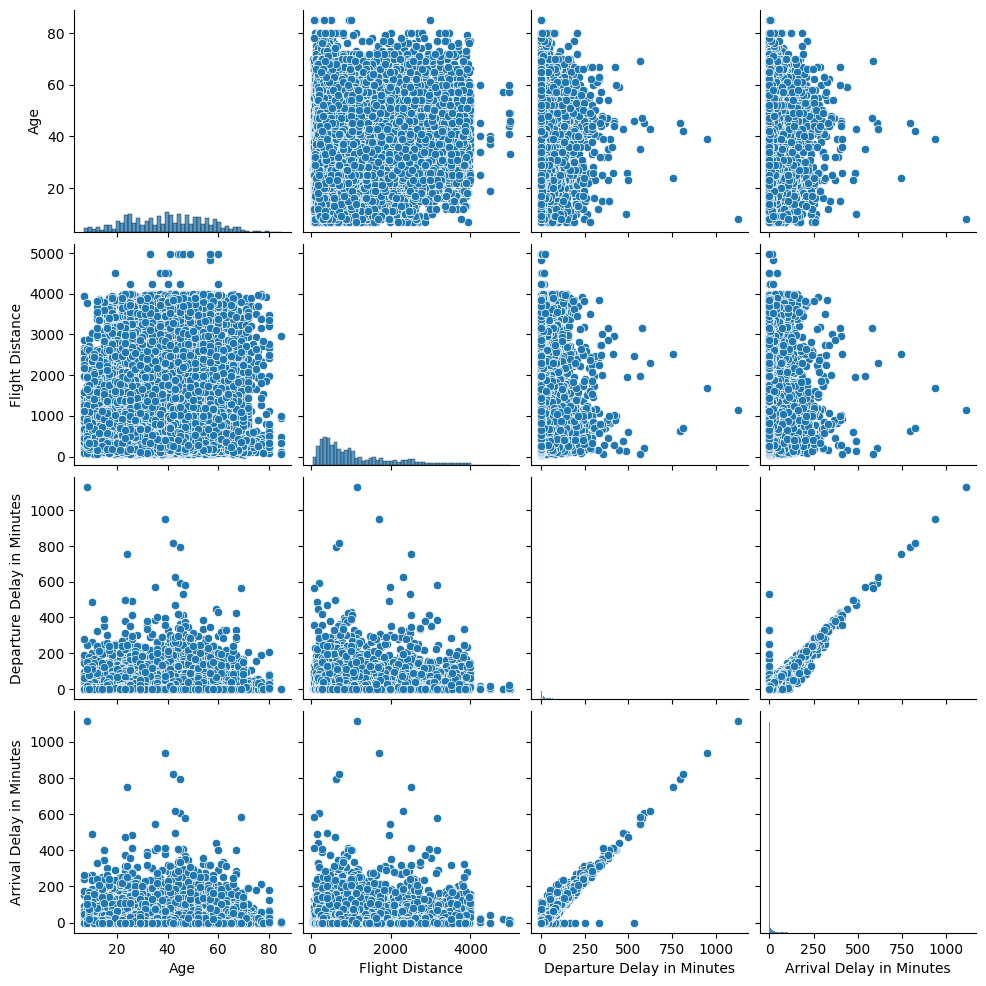

In [40]:
# TODO: Print the shape of the data
print('The shape of the data:', data.shape)
print('##----------------------------------------------------------------------------------------------')

# TODO: Print the information about the dataframe
print('The information about the dataframe')
print(data.info)
print('##----------------------------------------------------------------------------------------------')

# TODO Display the summary statistics of the dataframe
print('The summary statistics of the dataframe:')
print(data.describe)
print('##----------------------------------------------------------------------------------------------')

# Removing unnecesary columns

data=data.drop(['Unnamed: 0','id','Gender', 'Customer Type','Type of Travel', 'Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction'],axis=1)

# TODO: Replace any NaN values in the dataframe with 0
data = data.fillna(value= 0)

# TODO: Print the number of NaN values in each column of the dataframe
print('The number of NaN values in each column of the dataframe:')
print(data.isna().sum())

# TO DO: Create a pairplot using Seaborn library
sns.pairplot(data)
plt.show()


## Section 5. Model Building | Training

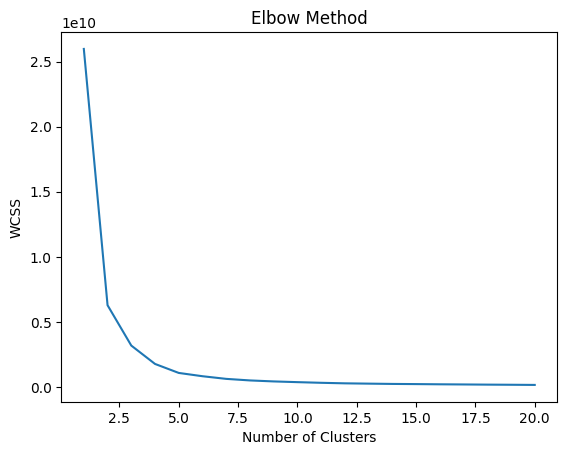

In [23]:
# TO DO: Implement the elbow method to determine the optimal number of clusters
# TO DO: Create a KMeans model for each number of clusters from 1 to 20
# TO DO: Fit the KMeans model to the data and append the within-cluster sum of squares (WCSS) to a list
wcss = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# TO DO: Plot the WCSS for each number of clusters
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

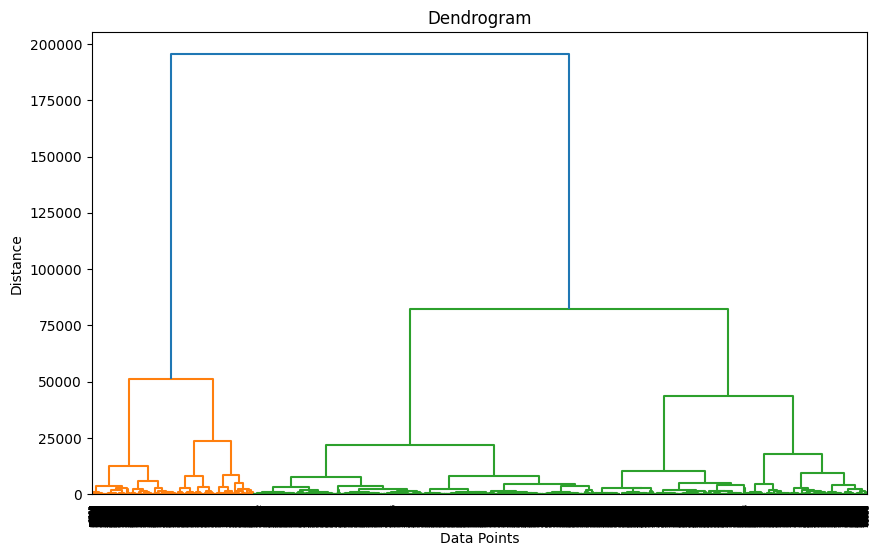

In [24]:
# TO DO: Create a dendrogram using hierarchical clustering
# TO DO: Use the ward method to calculate linkage
# TO DO: Plot the dendrogram
linkage_matrix = sch.linkage(data, method='ward')
plt.figure(figsize=(10, 6))
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

## Section 6. K Means Clustering

In [41]:
# TO DO: Create a KMeans model with the best number of clusters

best_kmeans_clusters = 2  # Replace with the best number of clusters determined from the elbow method, according to our plot
                       # I think the best numer of clusters(k) is 2.

kmeans = KMeans(n_clusters=2)

# TO DO: Fit the KMeans model to the data and assign the resulting
# cluster labels to a new column in the dataframe
kmeans.fit(data)
data['KMeans_Clusters'] = kmeans.labels_
data

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,KMeans_Clusters
0,52,160,50,44.0,1
1,36,2863,0,0.0,0
2,20,192,0,0.0,1
3,44,3377,0,6.0,0
4,49,1182,0,20.0,1
...,...,...,...,...,...
25971,34,526,0,0.0,1
25972,23,646,0,0.0,1
25973,17,828,0,0.0,1
25974,14,1127,0,0.0,1


## Section 7. Agglomerative Clustering

In [42]:
# TO DO: Create an Agglomerative Clustering model with the best number of clusters
# using the Euclidean distance metric and ward linkage
agg_clustering = AgglomerativeClustering(n_clusters = 2)

# TO DO: Fit the Agglomerative Clustering model to the data and assign
# the resulting cluster labels to a new column in the dataframe
agg_clustering.fit(data)
data['Agg_Clusters'] = agg_clustering.labels_
data

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,KMeans_Clusters,Agg_Clusters
0,52,160,50,44.0,1,0
1,36,2863,0,0.0,0,1
2,20,192,0,0.0,1,0
3,44,3377,0,6.0,0,1
4,49,1182,0,20.0,1,0
...,...,...,...,...,...,...
25971,34,526,0,0.0,1,0
25972,23,646,0,0.0,1,0
25973,17,828,0,0.0,1,0
25974,14,1127,0,0.0,1,0


## Section 8. Clusters Visualization

In [43]:
# TO DO: Remove outliers from the dataframe to improve visualization
threshold = 3
scores = np.abs((data - data.mean()) / data.std())
f_filtered = data[(scores <= threshold).all(axis=1)]

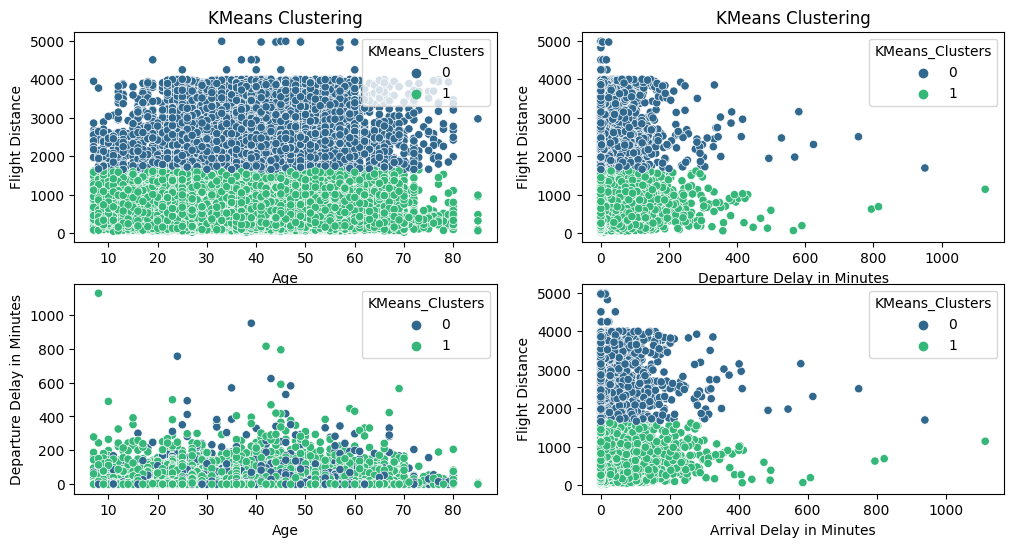

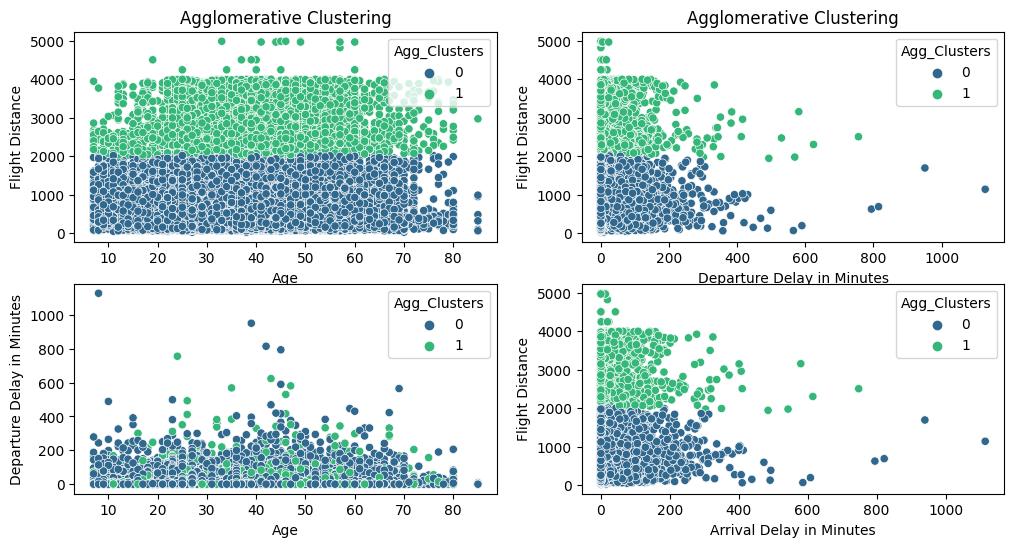

In [44]:
# TO DO: Create a scatter plot with subplots for each clustering method
# TO DO: Plot the data points for each cluster in a different color and label the clusters accordingly
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title('KMeans Clustering')
sns.scatterplot(data=data, x='Age', y='Flight Distance', hue=data['KMeans_Clusters'] , palette='viridis')
plt.subplot(2, 2, 2)
plt.title('KMeans Clustering')
sns.scatterplot(data=data, x='Departure Delay in Minutes', y='Flight Distance', hue=data['KMeans_Clusters'] , palette='viridis')
plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='Age', y='Departure Delay in Minutes', hue=data['KMeans_Clusters'] , palette='viridis')
plt.subplot(2, 2, 4)
sns.scatterplot(data=data, x='Arrival Delay in Minutes', y='Flight Distance', hue=data['KMeans_Clusters'] , palette='viridis')


plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title('Agglomerative Clustering')
sns.scatterplot(data=data, x='Age', y='Flight Distance', hue=data['Agg_Clusters'] , palette='viridis')
plt.subplot(2, 2, 2)
plt.title('Agglomerative Clustering')
sns.scatterplot(data=data, x='Departure Delay in Minutes', y='Flight Distance', hue=data['Agg_Clusters'] , palette='viridis')
plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='Age', y='Departure Delay in Minutes', hue=data['Agg_Clusters'] , palette='viridis')
plt.subplot(2, 2, 4)
sns.scatterplot(data=data, x='Arrival Delay in Minutes', y='Flight Distance', hue=data['Agg_Clusters'] , palette='viridis')


plt.show()